# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [457]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [458]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [459]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [460]:
# We find out about the total number of rows and columns information by running the Shape function from the Pandas library vi the df object.
df.shape

(1898, 9)

#### Observations:
We have 1,898 rows and 9 columns in the Data Frame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [461]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We have the following data types:
1. 1 column [cost_of_the_order] is of data type float64
2. 4 columns [order_id, customer_id, food_preparation_time, delivery_time] are of data type int64
3. 4 columns [restaurant_name, cuisine_type, day_of_the_week, rating] are of data type object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [462]:
# Write your code here
#We can get the total number of missing values in each column by running the following code:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Based on the response of the function call above, there is no missing value in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [463]:
# Write your code here
# We can get the statistical summary by running the following code below and to arrange them in a more readable fashion with the .T function
df.describe(include='all').T

count unique          top  freq           mean  \
order_id               1898.0    NaN          NaN   NaN      1477495.5   
customer_id            1898.0    NaN          NaN   NaN  171168.478398   
restaurant_name          1898    178  Shake Shack   219            NaN   
cuisine_type             1898     14     American   584            NaN   
cost_of_the_order      1898.0    NaN          NaN   NaN      16.498851   
day_of_the_week          1898      2      Weekend  1351            NaN   
rating                   1898      4    Not given   736            NaN   
food_preparation_time  1898.0    NaN          NaN   NaN       27.37197   
delivery_time          1898.0    NaN          NaN   NaN      24.161749   

                                 std        min         25%        50%  \
order_id                  548.049724  1476547.0  1477021.25  1477495.5   
customer_id            113698.139743     1311.0    77787.75   128600.0   
restaurant_name                  NaN        NaN         NaN        NaN   
cuisine_type                     NaN        NaN         NaN        NaN   
cost_of_the_order           7.483812       4.47       12.08      14.14   
day_of_the_week                  NaN        NaN         NaN        NaN   
rating                           NaN        NaN         NaN        NaN   
food_preparation_time       4.632481       20.0        23.0       27.0   
delivery_time               4.972637       15.0        20.0       25.0   

                              75%        max  
order_id               1477969.75  1478444.0  
customer_id              270525.0   405334.0  
restaurant_name               NaN        NaN  
cuisine_type                  NaN        NaN  
cost_of_the_order         22.2975      35.41  
day_of_the_week               NaN        NaN  
rating                        NaN        NaN  
food_preparation_time        31.0       35.0  
delivery_time                28.0       33.0

#### Observations:
The minimum time it takes for food to be prepared once an order is placed: 20.0 minutes

The average time it takes for food to be prepared once an order is placed: 27.37197 minutes

The maximum time it takes for food to be prepared once an order is placed: 35.0 minutes

### **Question 5:** How many orders are not rated?

In [464]:
# Write the code here
#We take the column [rating] from the data frame and compute the number of entries that have the value 'Not given'
(df['rating']=='Not given').sum()

736

#### Observations:
We have 736 entries that have a 'Not given' ratng entry.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

<Axes: xlabel='day_of_the_week', ylabel='Count'>

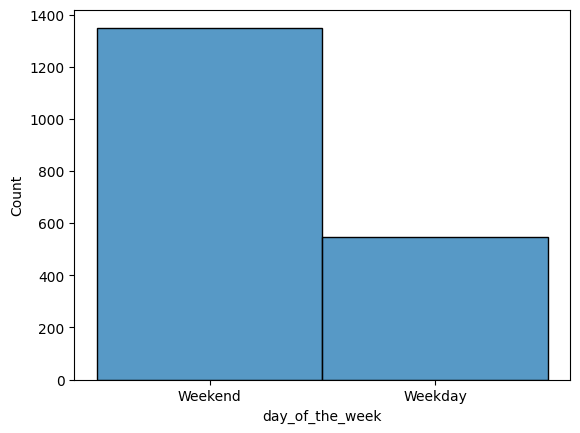

In [465]:
#Plot a histogram of the distribution of the number orders spread between weekends and weekdays
sns.histplot(data=df, x='day_of_the_week')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


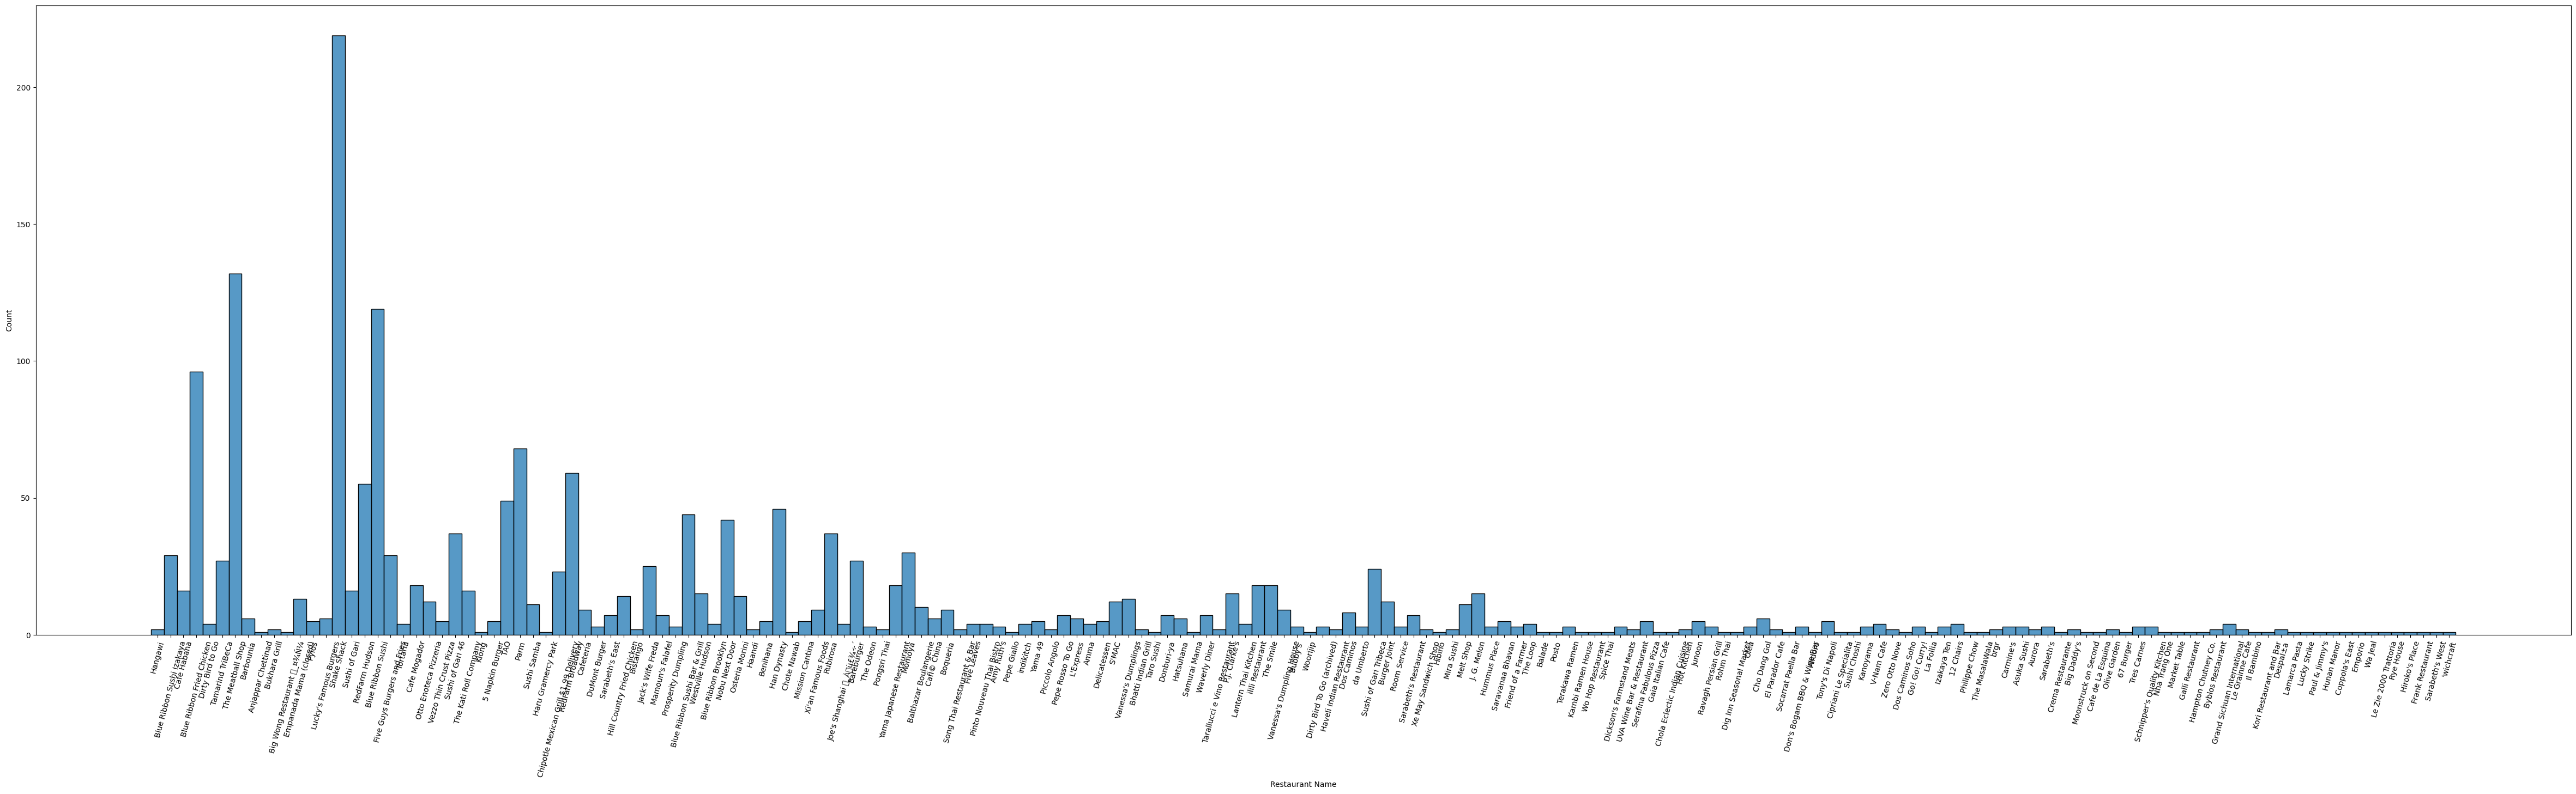

In [466]:
plt.figure(figsize=(60,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Restaurant Name')
sns.histplot(data=df, x='restaurant_name')
plt.xticks(rotation=75)

<Axes: xlabel='rating', ylabel='Count'>

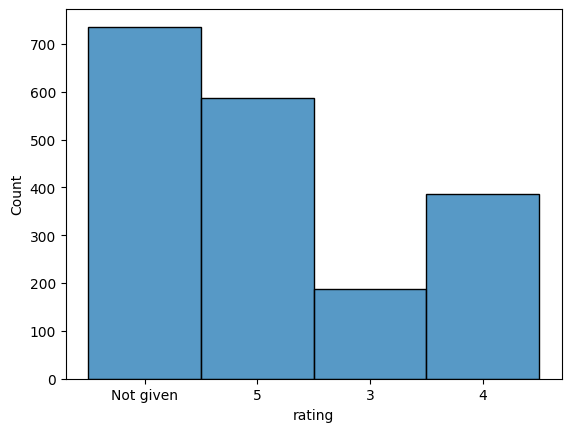

In [467]:
#Plot a histogram of the distribution of the ratings spread between all orders
sns.histplot(data=df, x='rating')

<Axes: xlabel='Cuisine Type', ylabel='Count'>

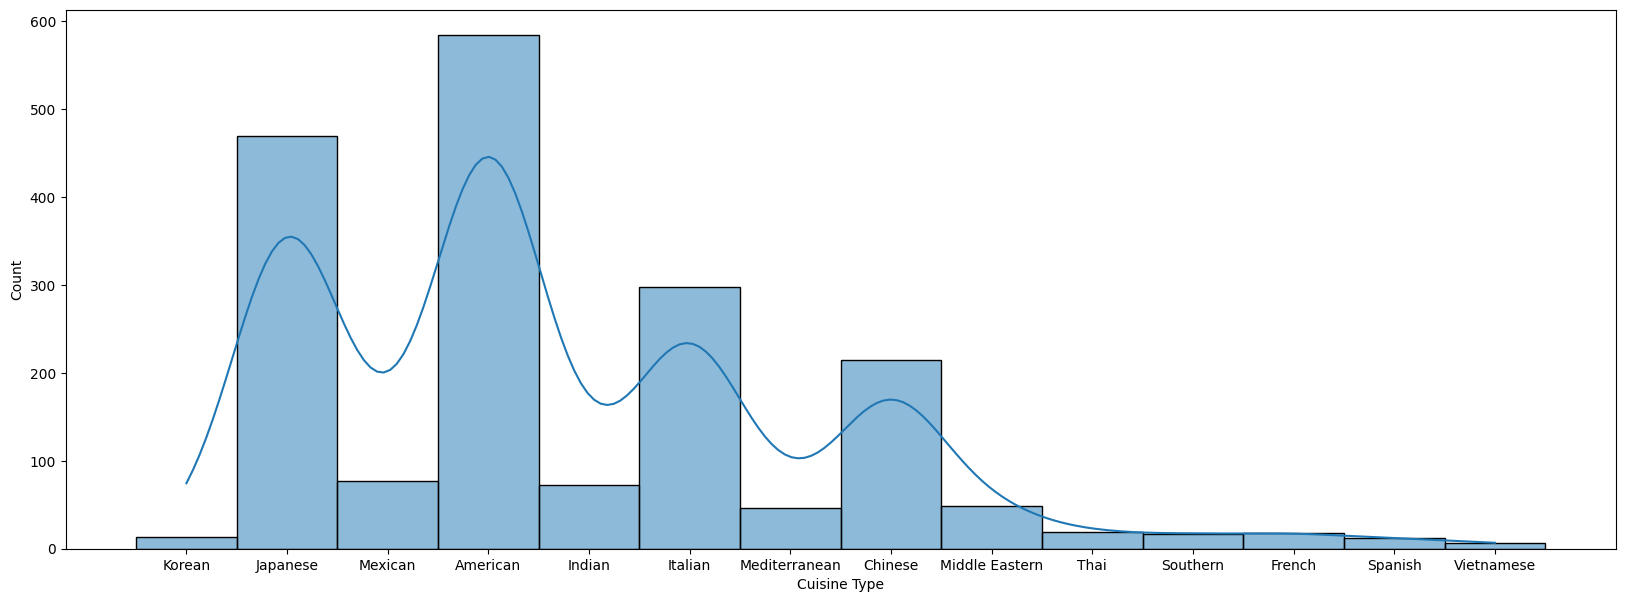

In [468]:
#Plot a histogram of the distribution of the cuisine types

#plt.title('Histogram:Cuisine Ratings')
plt.figure(figsize=(20,7)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')
sns.histplot(data=df, x='cuisine_type', kde=True)

/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


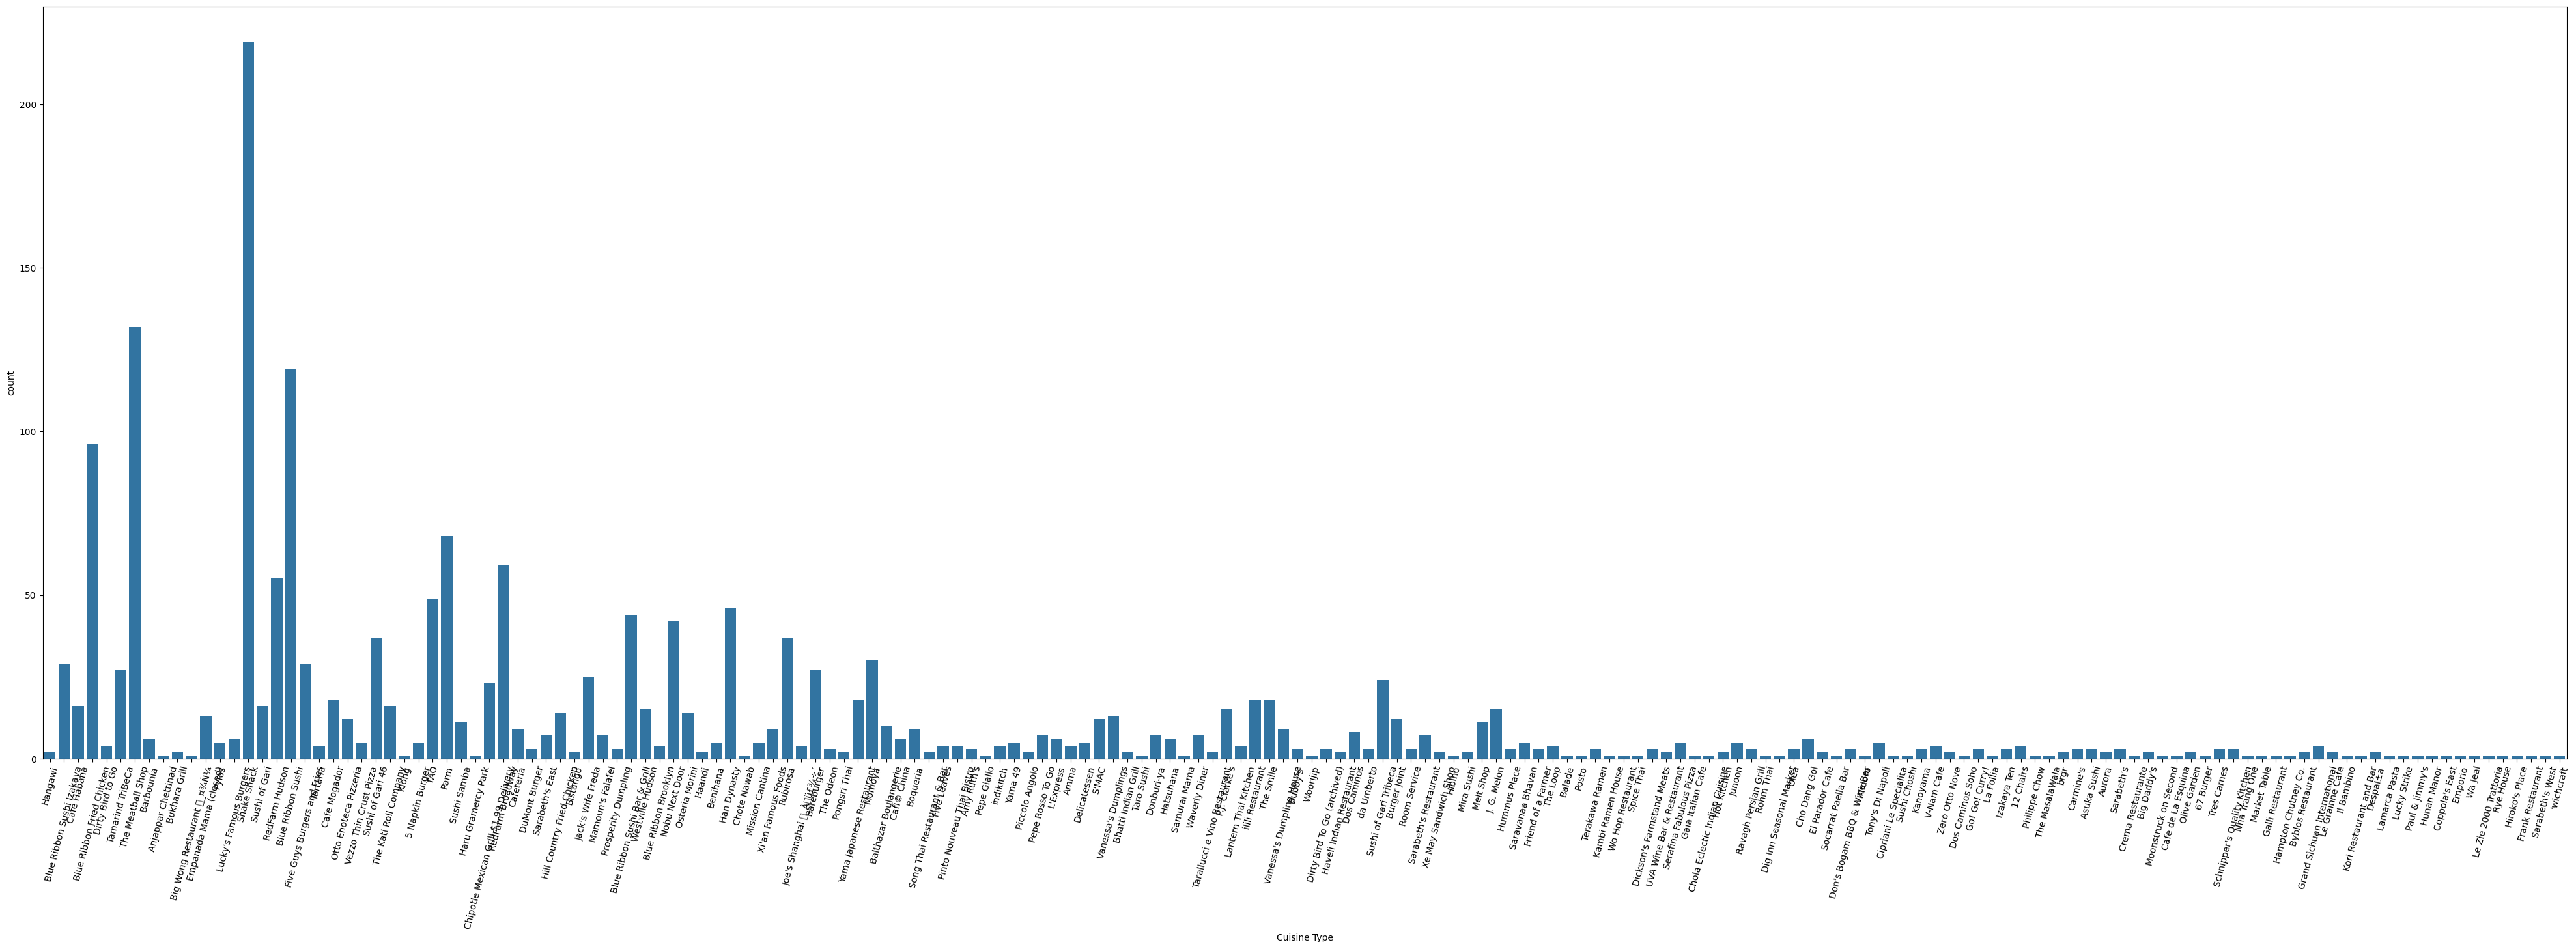

In [469]:
#Plot a CountPlot of the distribution of the rating of orders against the cuisine types

plt.figure(figsize=(50,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
plt.xticks(rotation=75)
sns.countplot(data=df, x='restaurant_name'); # The hue parameter allows us to separate the different ratings and see them against the cuisine types

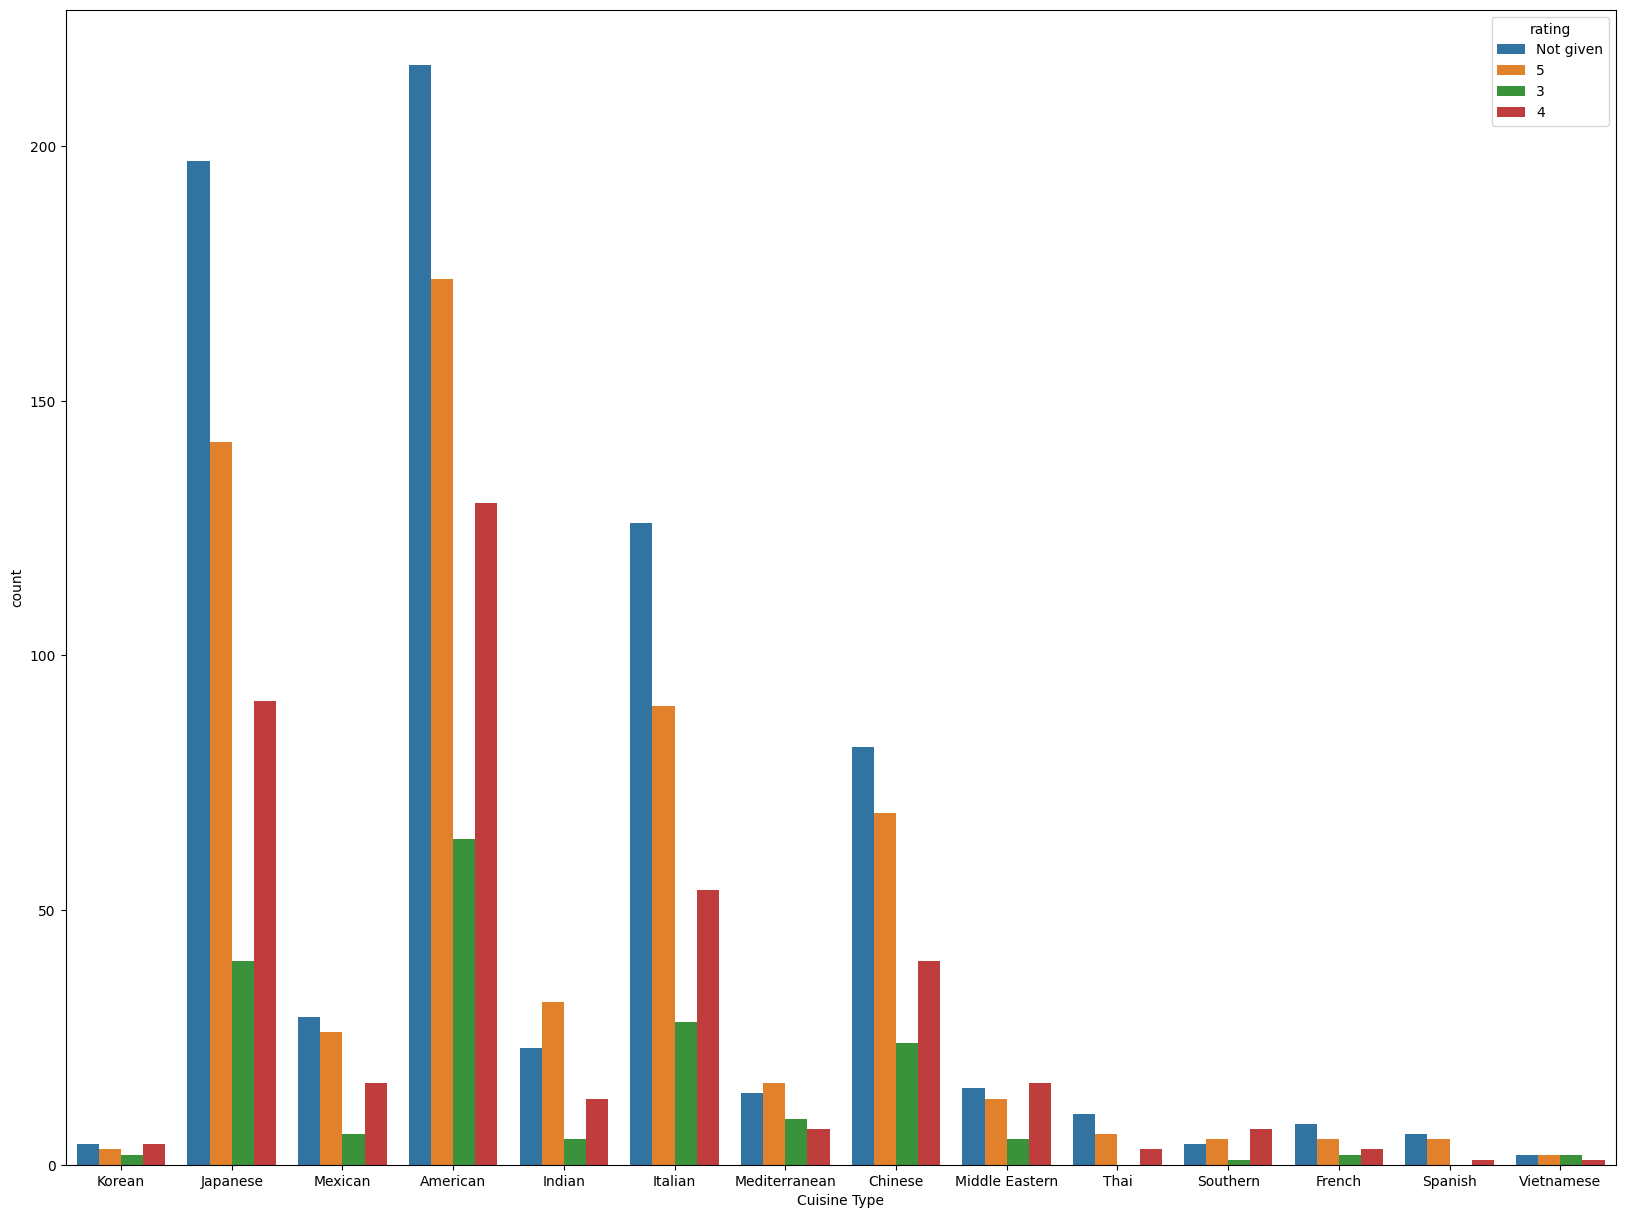

In [470]:
#Plot a CountPlot of the distribution of the rating of orders against the cuisine types

plt.figure(figsize=(20,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
sns.countplot(data=df, x='cuisine_type', hue='rating'); # The hue parameter allows us to separate the different ratings and see them against the cuisine types

/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


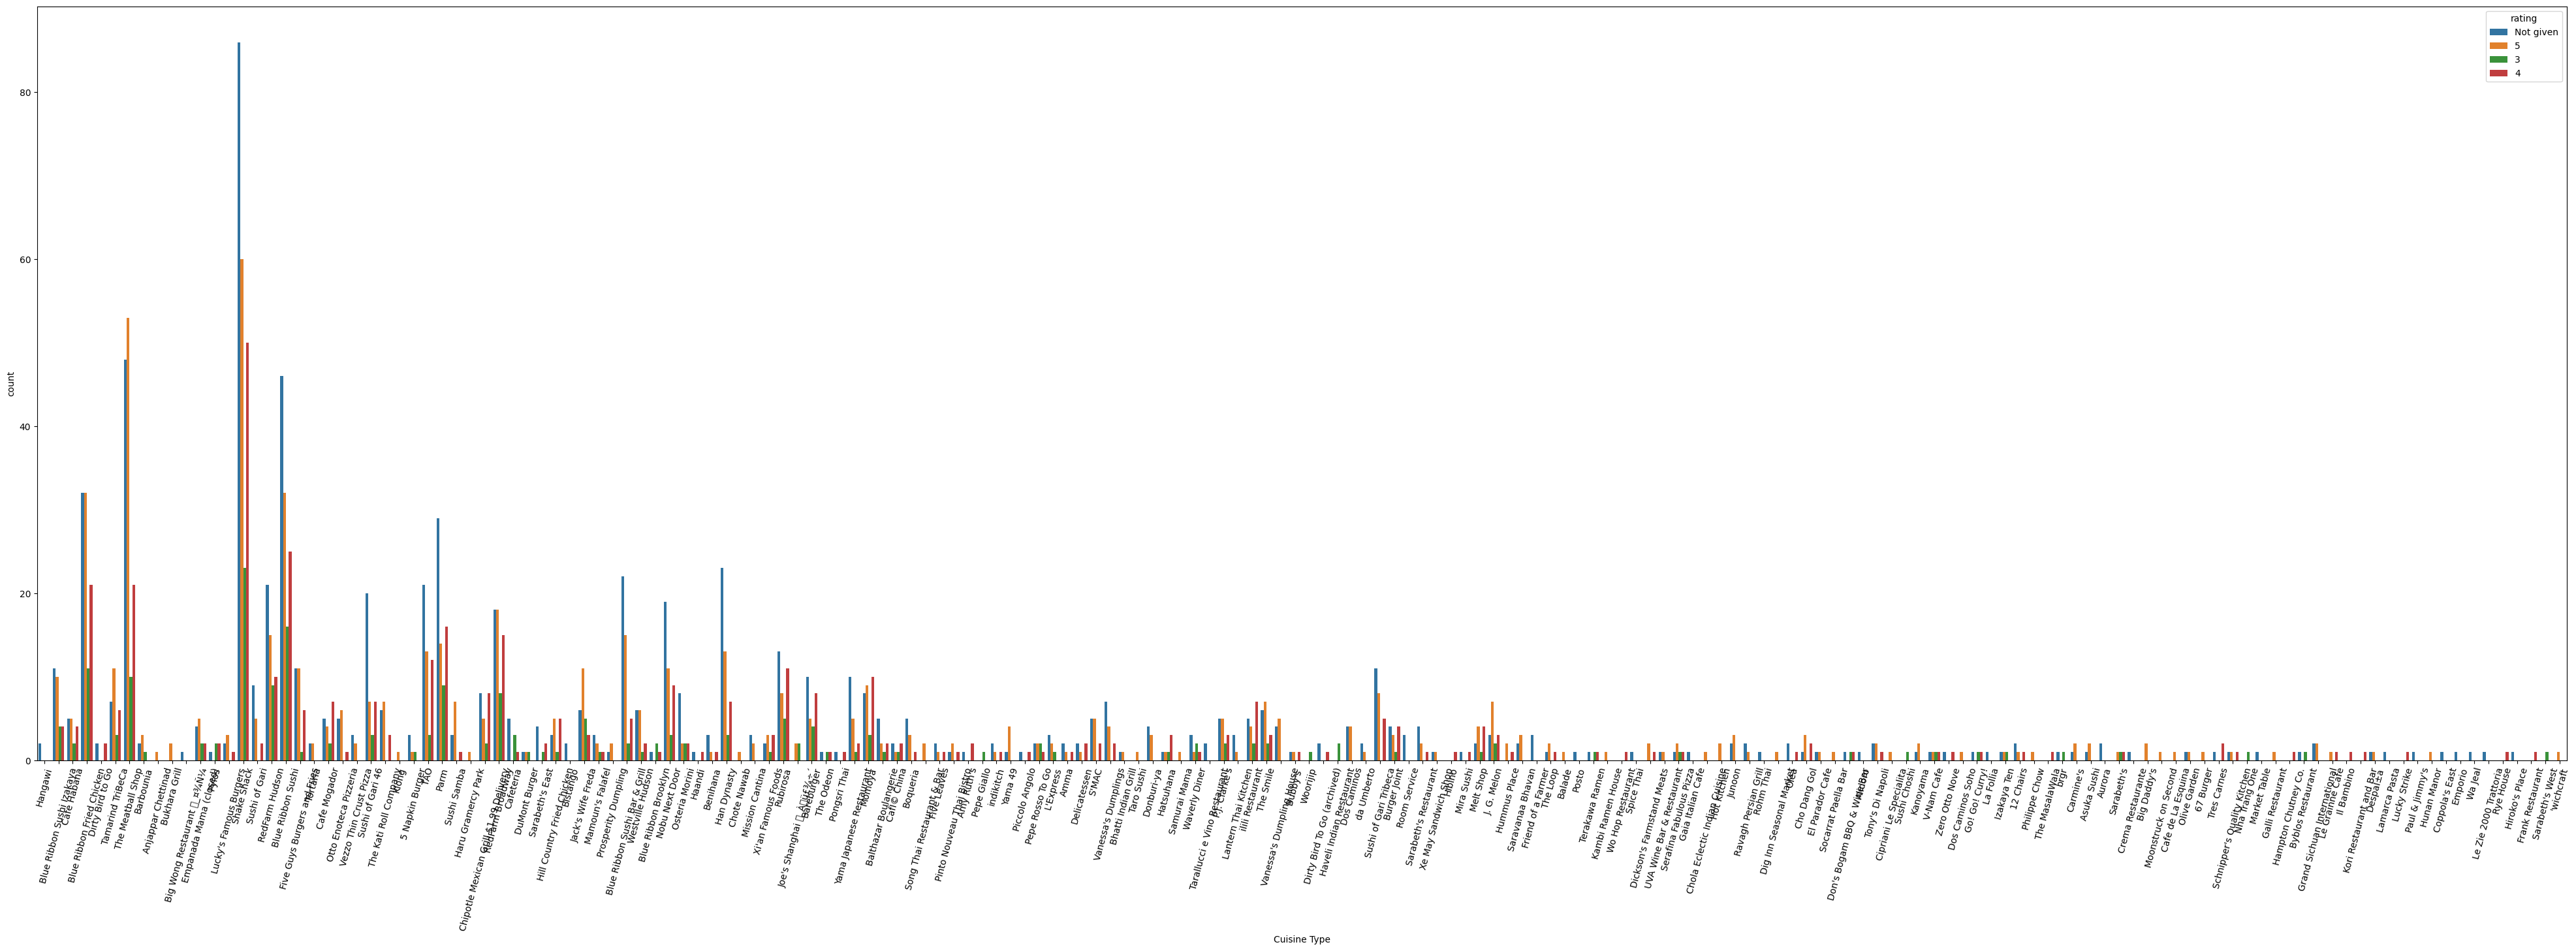

In [471]:
#Plot a CountPlot of the distribution of the rating of orders against the cuisine types

plt.figure(figsize=(50,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
plt.xticks(rotation=75)
sns.countplot(data=df, x='restaurant_name', hue='rating'); # The hue parameter allows us to separate the different ratings and see them against the cuisine types

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [472]:
# Write the code here
#We need to find the value counts for the top 5 restaurants by aggregating the Vlaue COunts in the field Restaurant Name field from the data frame
df['restaurant_name'].value_counts().head(5)



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of orders are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [473]:
# Write the code here
#(df['day_of_the_week'] == 'Weekend').sum() #
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American is the most popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [474]:
# Write the code here
print(df['cost_of_the_order'].count()) # Get and print the total number of orders
(df['cost_of_the_order'] > 20).sum() # Get the count of orders more than 20 dollars
#Get the value above as Percentage of total orders
greaterthan20 = int((df['cost_of_the_order'] > 20).sum())
totalorders = int(df['cost_of_the_order'].count())
percentage  = (greaterthan20 / totalorders) * 100
print('Percentage of orders more than USD 20: ' + str(percentage) + '%')

1898
Percentage of orders more than USD 20: 29.24130663856691%


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [475]:
# Write the code here
(df['delivery_time'].mean())

24.161749209694417

#### Observations:
The mean Order delivery time is 24.161749209694417 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [476]:
# Write the code here
# Find the 3 top Customer IDs with the highest orders
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer                Orders Made

52832                   (13 Orders Made)

47440                   (10 Orders Made)

83287                   (9 Orders Made)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

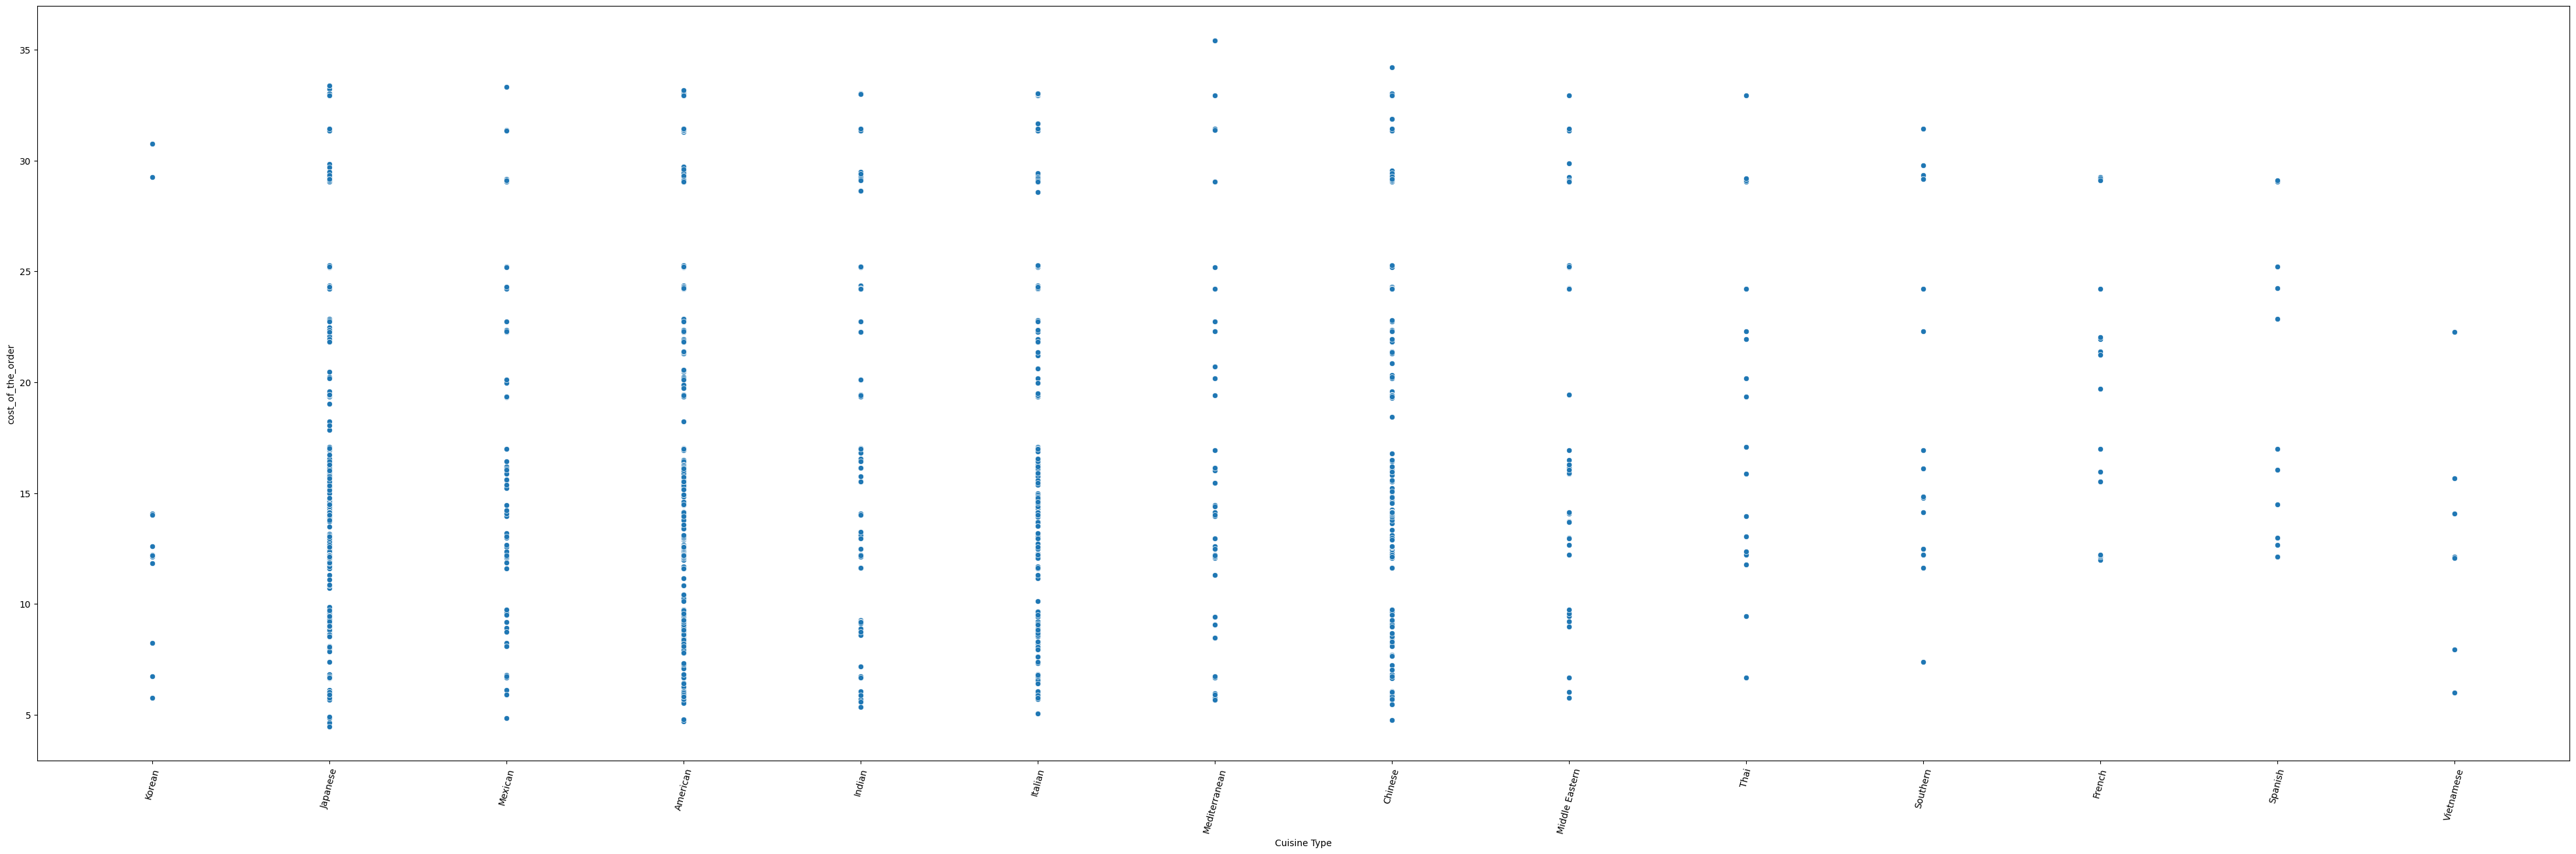

In [477]:
# Write the code here
plt.figure(figsize=(50,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
plt.xticks(rotation=75)
sns.scatterplot(data=df, x='cuisine_type', y='cost_of_the_order');

/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


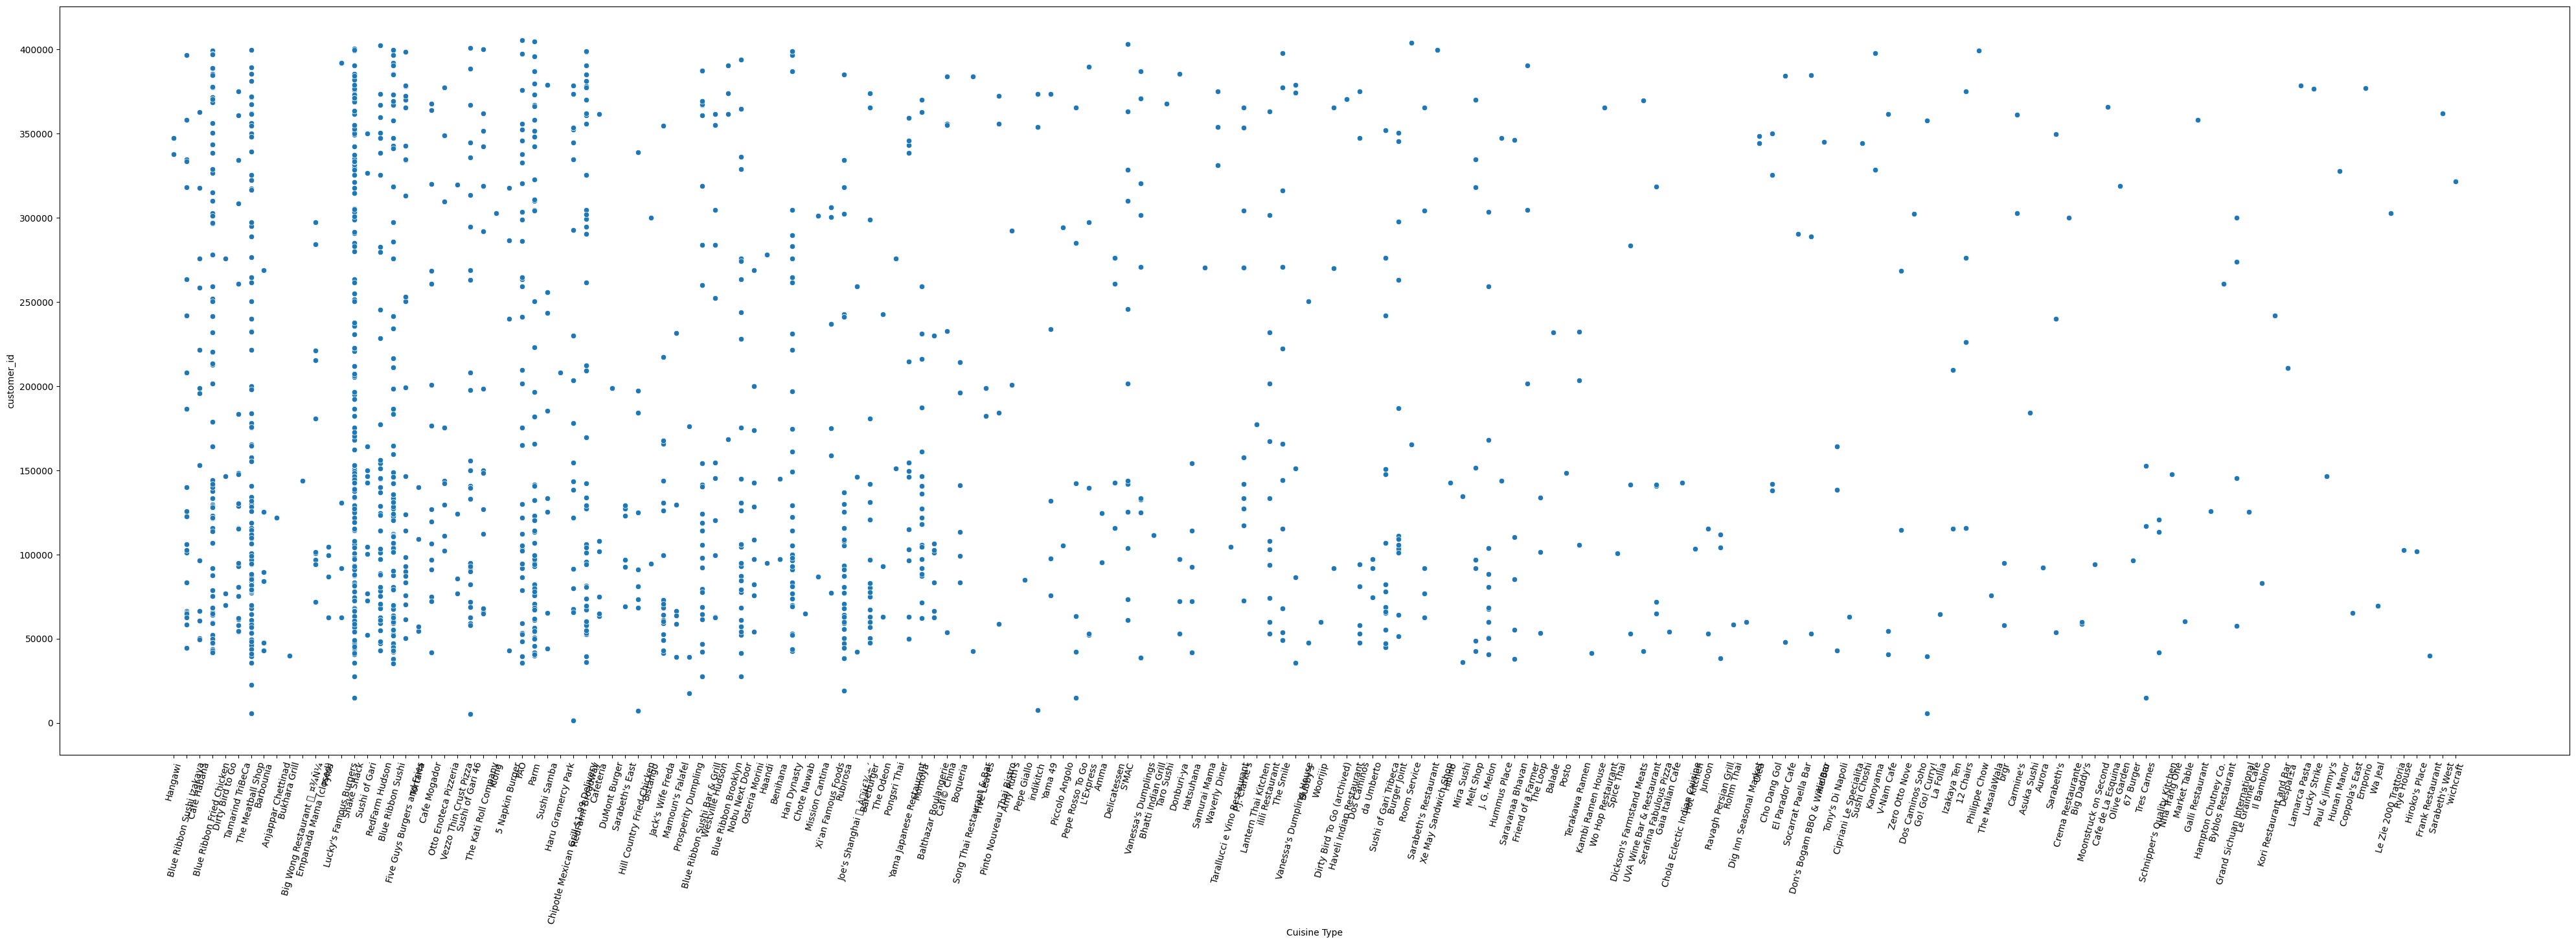

In [478]:
# Write the code here
plt.figure(figsize=(50,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
plt.xticks(rotation=75)     # This instruction ensures that the labels on the x axis are legible and are rotated by 75 degrees
sns.scatterplot(data=df, x='restaurant_name', y='customer_id');

/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/philip/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


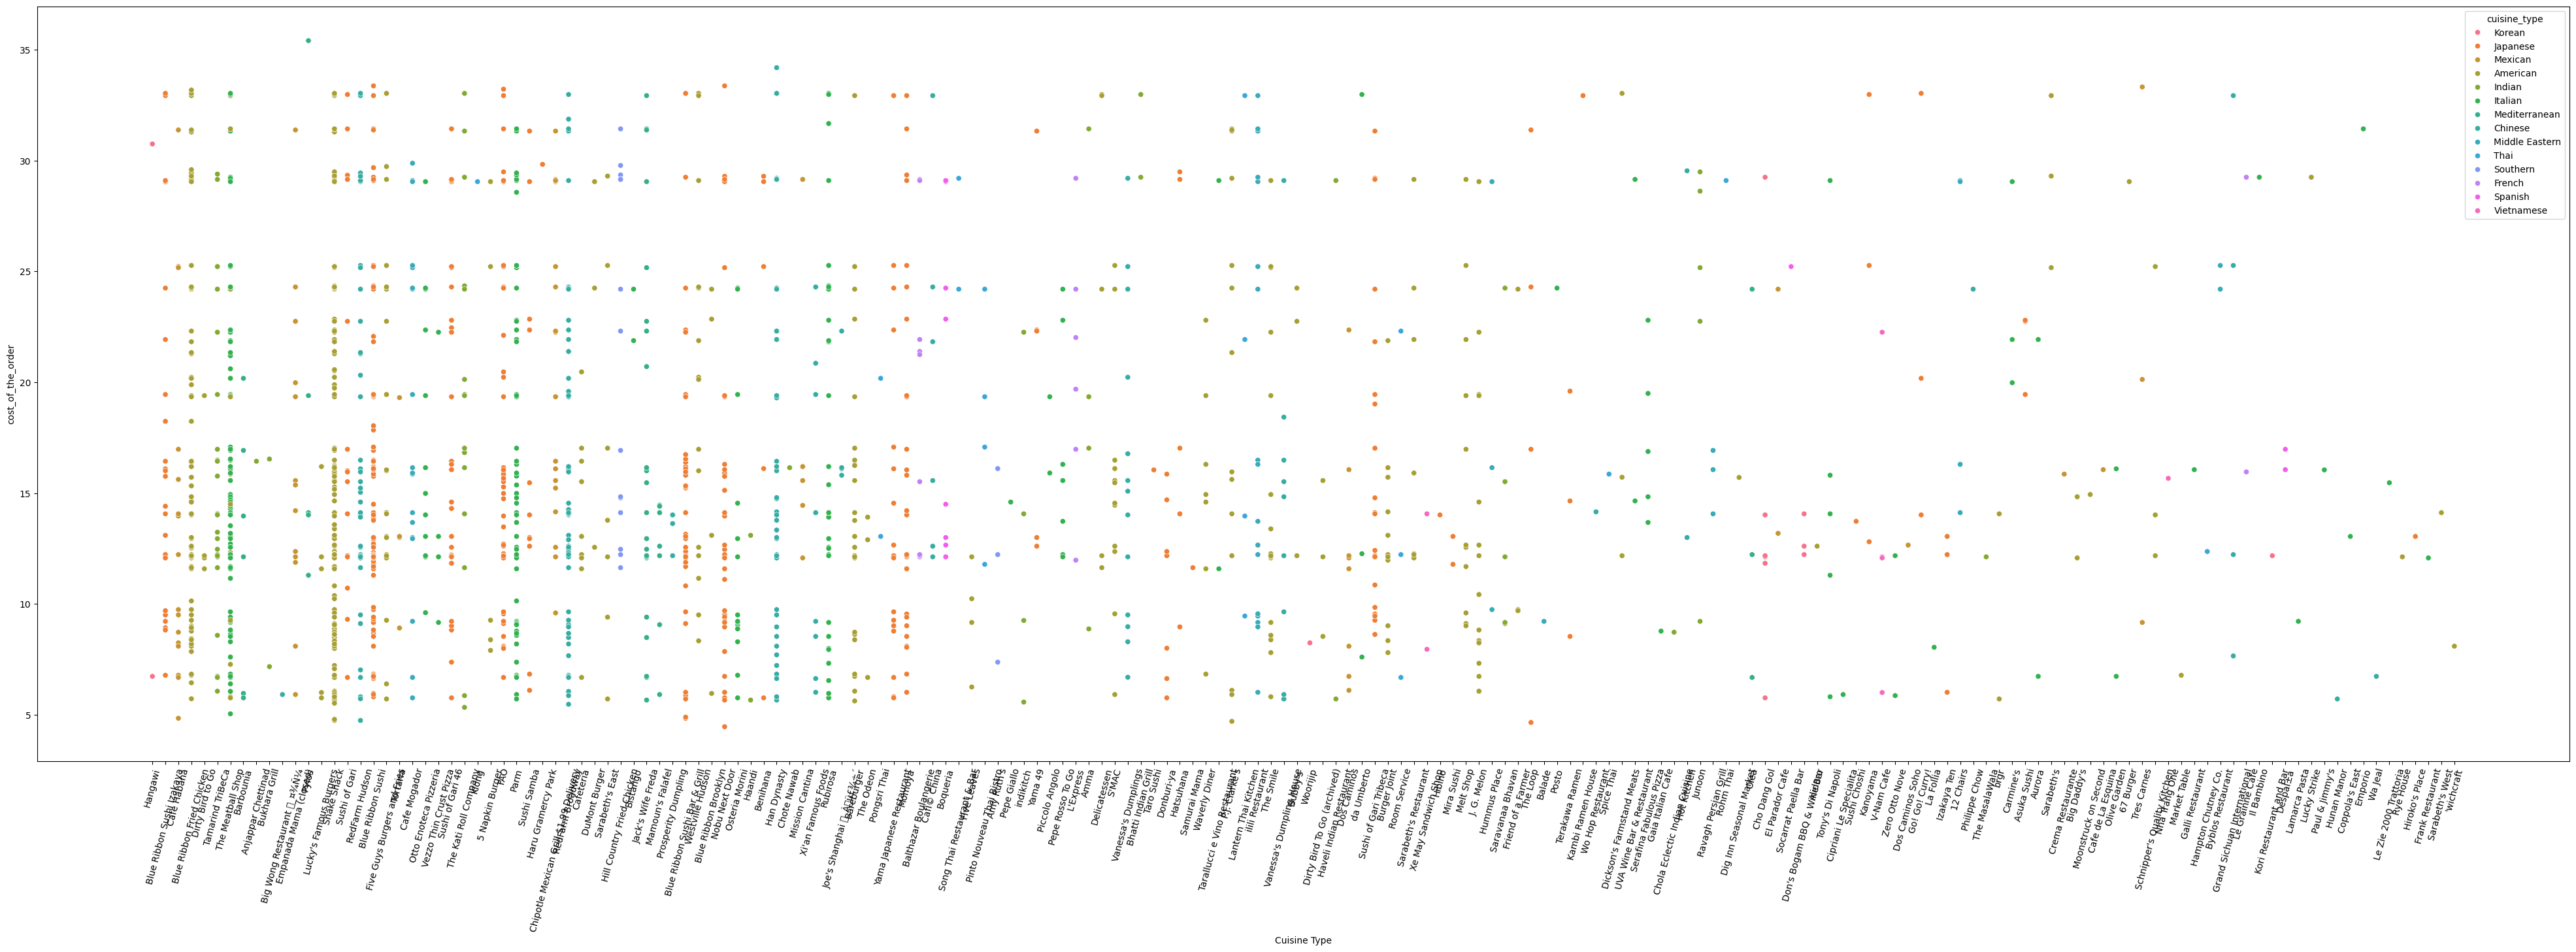

In [479]:
# Write the code here
plt.figure(figsize=(50,15)) # This instruction allows us to expand the size of the canvas, especialy where the data is large 
plt.xlabel('Cuisine Type')  #This instruction allows us to lable the X axis on the plot
plt.xticks(rotation=75)
sns.scatterplot(data=df, x='restaurant_name', y='cost_of_the_order', hue='cuisine_type');

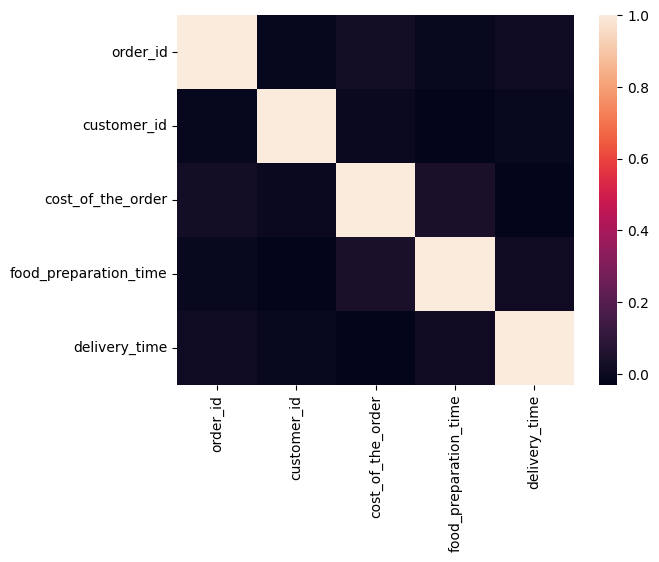

In [480]:
#sns.heatmap(data=df[['order_id','customer_id','restaurant_name','cost_of_the_order','day_of_the_week']].corr());
sns.heatmap(data=df[['order_id','customer_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']].corr());

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [432]:
'''
First, we need to filter the restaurants that have a rating.
We can do this by creating a new DataFrame df_rated that only includes rows where the [rating] column is not equal to ‘Not given’.
'''
df_rated = df[df['rating'] != 'Not given'].copy()

'''
We then convert the rating column to integer
'''
df_rated['rating'] = df_rated['rating'].astype('int')

'''
Now, we can create a new DataFrame df_rating_count that contains the restaurant names and their rating counts.
We can do this using the groupby() and count() methods.
'''
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

'''
We finally, get the restaurant names that have a rating count more than 50 by filtering the df_rating_count DataFrame.
'''
restaurant_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
print(restaurant_names)

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
4                         Parm
5             RedFarm Broadway
6               RedFarm Hudson
Name: restaurant_name, dtype: object


#### Observations:

1                  Shake Shack

2            The Meatball Shop

3            Blue Ribbon Sushi

4    Blue Ribbon Fried Chicken

5                         Parm

6             RedFarm Broadway

7               RedFarm Hudson


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [268]:
# Write the code here
(df['cost_of_the_order'] > 20).aggregate
# Calculate the percentage to be charged
df['percentage'] = 0
df.loc[df['cost_of_the_order'] > 20, 'percentage'] = 0.25
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'percentage'] = 0.15

# Calculate the revenue
df['revenue'] = df['cost_of_the_order'] * df['percentage']

# Calculate the net revenue
net_revenue = df['revenue'].sum()

print("Net revenue: ", net_revenue)

Net revenue:  6166.303


#### Observations:
The netrevenue is USD 6,166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [286]:
# Write the code here

# Calculate the percentage to be charged
df['totalordertime'] = 0
df.loc[df['cost_of_the_order'] > 20, 'percentage'] = 0.25
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'percentage'] = 0.15

# Calculate the revenue
df['totalordertime'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the net revenue
ordersover60 = int((df['totalordertime'] > 60).sum())   # The number of orders that take more than 60 minutes to be delivered
totalorders = int(df['totalordertime'].count())

percentage  = (ordersover60 / totalorders) * 100
print('Percentage of orders taking more than 60 minutes: ' + str(percentage) + '%')


#print("Net revenue: ", net_revenue)

Percentage of orders taking more than 60 minutes: 10.537407797681771%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [290]:
# Write the code here
#Get the mean delivery time by grouping delivery time by day of week
df.groupby('day_of_the_week')['totalordertime'].mean()

day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: totalordertime, dtype: float64

#### Observations:
The Weekend Delivery times tend to be shorter by 5.6 seconds on average

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The American and Japanese cuisine types are very popular

* The quality of food is generally good judging from the ratings

* The lack of clear feedback from unrated ordering experiences could be misleading and we need to buld up this data and reduce the unrated values to a minimum if possible.

### Recommendations:

*  The company should give an incentive to encourage more customers to rate the delivery and culinary experiences to build up this data set. We need to reduce the 'Not Given' entries.

* The delivery company should give more vouchers to encourage more usage of their app. The number of repeat orders is rather low compared to the total number of orders.

* The company should drive a lot more promotions on the popular cuisine types. These are clearly the revenue earners. i.e. American, Japanese, Italian, Chinese, Indian and Mexican.

* it might be of interest to carry out a survey to find out why the other cuisine types may not be as popular. Is this due to poor app design, the wrong restuarants? Users not giving feedback as stated in point one?

---